# 多元 GMM 迭代

In [1]:
import matplotlib.pyplot as plt
p = plt.rcParams
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5
colors = ['lightblue', 'orange', 'green']


import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


iris = datasets.load_iris(); X = iris.data[:, :2]
input_data = iris.data[:, :2]
K = 3

#### Fig 15

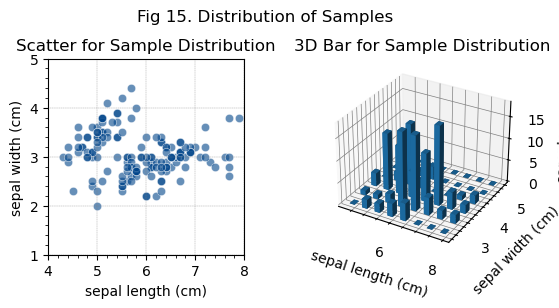

In [2]:
fig = plt.figure(figsize = (6, 3)) 
ax = fig.add_subplot(121)
ax.scatter(x=X[:, 0], y=X[:, 1], 
        color=np.array([0, 68, 138])/255., 
        alpha=0.6,
        linewidth = 0.5, edgecolor=[1,1,1])

ax.set_xlim(4, 8); ax.set_ylim(1, 5)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Scatter for Sample Distribution')

# 3D Bar
hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=[np.arange(4, 8.5, 0.5), np.arange(2, 5.5, 0.5)])
ax = fig.add_subplot(122, projection='3d')
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.2 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel('sample count')
ax.set_title('3D Bar for Sample Distribution')

plt.suptitle('Fig 15. Distribution of Samples')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

weights_init = [0.33, 0.33, 0.34]
means_init = np.array([[4.6, 4], [5.2, 2.4], [7.0, 3.5]])
precisions_init = np.array([[[1.0, 0], [0, 1.0]], [[1.0, 0], [0, 1.0]], [[1.0, 0], [0, 1.0]]])
covariances_init = np.linalg.inv(precisions_init)

class_params = [(weights_init[i], means_init[i], covariances_init[i]) for i in range(K)]

#### Fig 17

C:\Users\zyj19\AppData\Local\Temp\ipykernel_26644\969270410.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis')


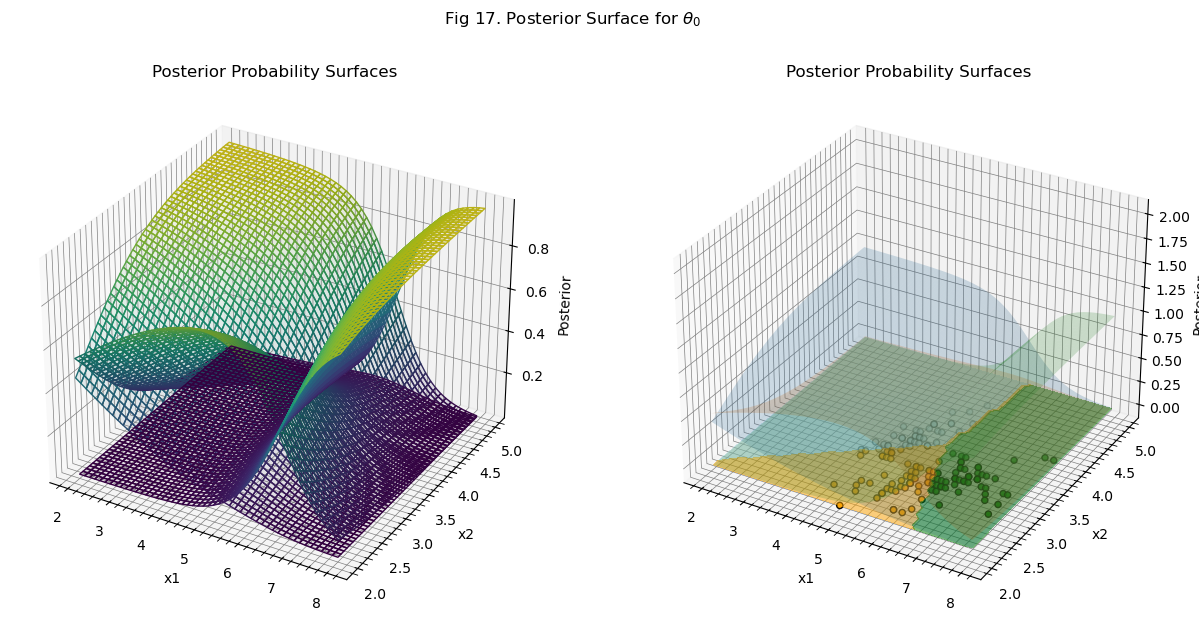

In [4]:
from matplotlib import cm
color_map = cm.get_cmap('viridis')


x = np.linspace(2,8)
y = np.linspace(2,5)
X_grid, Y_grid = np.meshgrid(x,y)
XX = X_grid.ravel()
YY = Y_grid.ravel()
grid_input = [[XX[i], YY[i]] for i in range(len(XX))]

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

total_px = np.zeros_like(XX)
total_px_pred = np.zeros_like(iris.data[:, :1].ravel())
posteriors = []
posteriors_pred = []

for c, mu, sigma in class_params:
    px_c = c * multivariate_normal.pdf(grid_input, mean=mu, cov=sigma)
    total_px += px_c
    posteriors.append(px_c)

    px_c = c * multivariate_normal.pdf(input_data, mean=mu, cov=sigma)
    total_px_pred += px_c
    posteriors_pred.append(px_c)


for i, (c, mu, sigma) in enumerate(class_params):
    posterior = posteriors[i] / total_px
    posterior_grid = posterior.reshape(50, 50)
    rgba_color = color_map(posterior_grid)
    ax.plot_surface(X_grid, Y_grid, posterior_grid, alpha=0.1, label=f'$f_{{YX}}(C_{i+1}|x)$', facecolors=rgba_color)
    ax2.plot_surface(X_grid, Y_grid, posterior_grid, alpha=0.2, label=f'$f_{{YX}}(C_{i+1}|x)$')


# Decision Boundary
max_posterior_class = np.argmax(posteriors, axis=0)
max_posterior_class_pred = np.argmax(posteriors_pred, axis=0)
max_posterior_class_grid = max_posterior_class.reshape(50, 50)
ax2.contourf(X_grid, Y_grid, max_posterior_class_grid, levels=[-0.5, 0.5, 1.5, 2.5], colors=colors, alpha=0.5, zdir='z', offset=0)


sample_colors = [colors[i] for i in max_posterior_class_pred]
ax2.scatter(input_data[:,0], input_data[:,1], c=sample_colors, edgecolors='black')

for _ax in [ax, ax2]:
    _ax.set_xlabel('x1')
    _ax.set_ylabel('x2')
    _ax.set_zlabel('Posterior')
    _ax.set_title('Posterior Probability Surfaces')

plt.suptitle(f'Fig 17. Posterior Surface for $\\theta_0$')
plt.show()


#### Fig 16

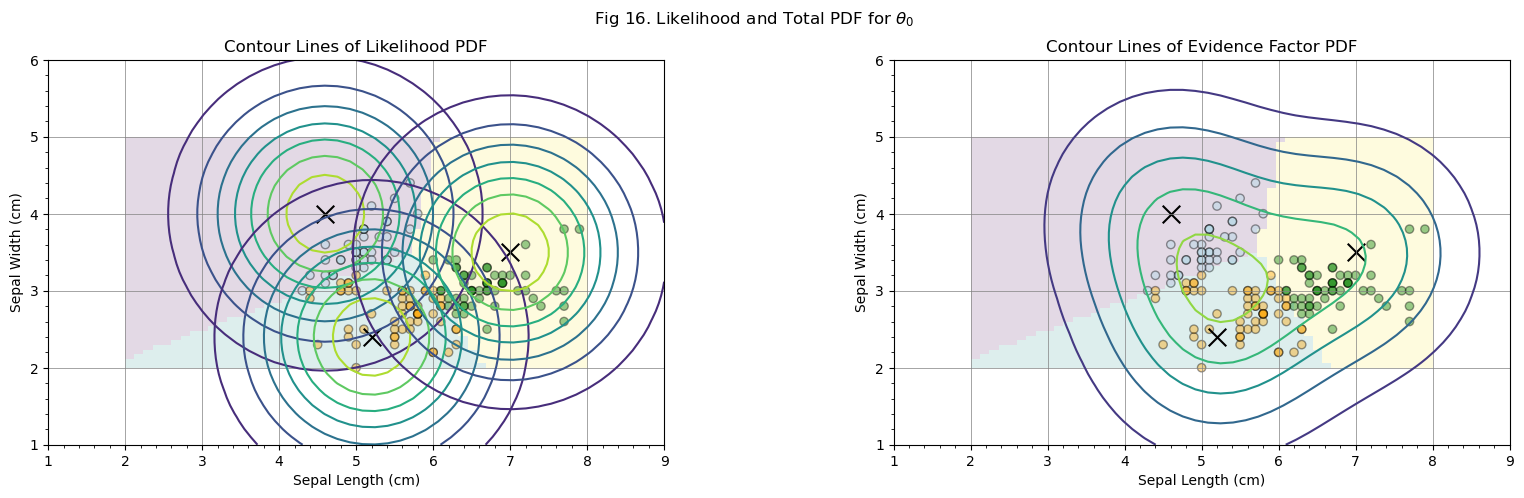

In [5]:
x = np.linspace(1,9)
y = np.linspace(1,6)
X,Y = np.meshgrid(x,y)
Z_sum = 0

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)

for i in range(3):
    rv = multivariate_normal(means_init[i], covariances_init[i])
    Z = rv.pdf(np.dstack((X,Y)))
    Z_sum += weights_init[i]*Z
    ax.contour(X,Y,Z)
ax.set_title('Contour Lines of Likelihood PDF')

# Evidence Factor
ax2 = fig.add_subplot(122)
ax2.contour(X,Y,Z_sum)
ax2.set_title('Contour Lines of Evidence Factor PDF')

for _ax in [ax, ax2]:
    _ax.set_xlabel('Sepal Length (cm)')
    _ax.set_ylabel('Sepal Width (cm)')
    _ax.imshow(max_posterior_class_grid, extent=(2, 8, 2, 5), origin='lower', cmap='viridis', alpha=0.15)
    _ax.scatter(input_data[:,0], input_data[:,1], c=sample_colors, edgecolors='black', alpha= 0.4)
    for i in range(3):
        _ax.scatter(means_init[i][0], means_init[i][1], marker='x', c='black', s=160)

plt.suptitle('Fig 16. Likelihood and Total PDF for $\\theta_0$')
plt.show()

#### Fig 18

d:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\miniconda\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


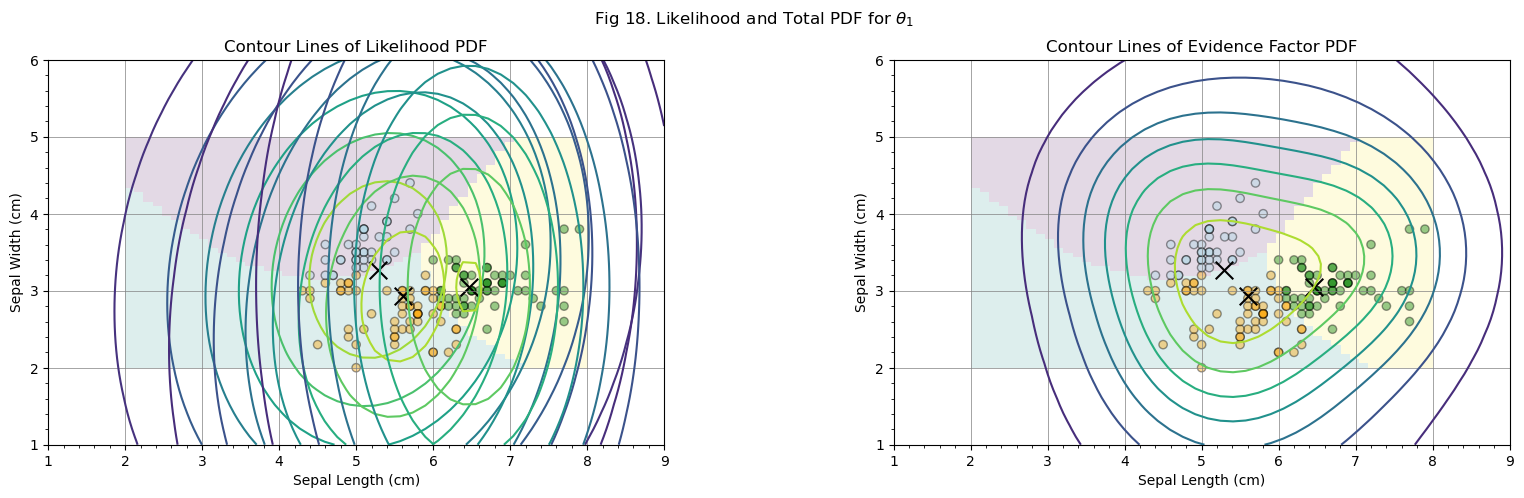

In [6]:
gmm = GaussianMixture(n_components=K,
                      covariance_type='full',
                      tol=1e-6,
                      weights_init=weights_init,
                      means_init=means_init,
                      precisions_init=precisions_init,
                      max_iter=1)

gmm.fit(input_data);
result = gmm.predict(input_data)
covariances = np.linalg.inv(gmm.covariances_)

# plot PDF
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)

for i in range(3):
    rv = multivariate_normal(gmm.means_[i], covariances[i])
    Z = rv.pdf(np.dstack((X,Y)))
    Z_sum += weights_init[i]*Z
    ax.contour(X,Y,Z)
ax.set_title('Contour Lines of Likelihood PDF')

# Evidence Factor
ax2 = fig.add_subplot(122)
ax2.contour(X,Y,Z_sum)
ax2.set_title('Contour Lines of Evidence Factor PDF')

# use gmm.fit to calculate dicision boundaries
max_posterior_class = gmm.predict(grid_input)
max_posterior_class_grid = max_posterior_class.reshape(50, 50)
sample_colors = [colors[i] for i in result]

for _ax in [ax, ax2]:
    _ax.set_xlabel('Sepal Length (cm)')
    _ax.set_ylabel('Sepal Width (cm)')
    _ax.imshow(max_posterior_class_grid, extent=(2, 8, 2, 5), origin='lower', cmap='viridis', alpha=0.15)
    _ax.scatter(input_data[:,0], input_data[:,1], c=sample_colors, edgecolors='black', alpha=0.4)
    for i in range(3):
        _ax.scatter(gmm.means_[i][0], gmm.means_[i][1], marker='x', c='black', s=160)
        

plt.suptitle('Fig 18. Likelihood and Total PDF for $\\theta_1$')
plt.show()